Cross-validation R² scores: [0.38606142 0.60170856 0.7005777  0.47005244 0.61877581]
Average cross-validation R²: 0.5554351856953671
Hold-out R² score: 0.6735544749982356
Hold-out Mean Squared Error: 0.9704268976830458


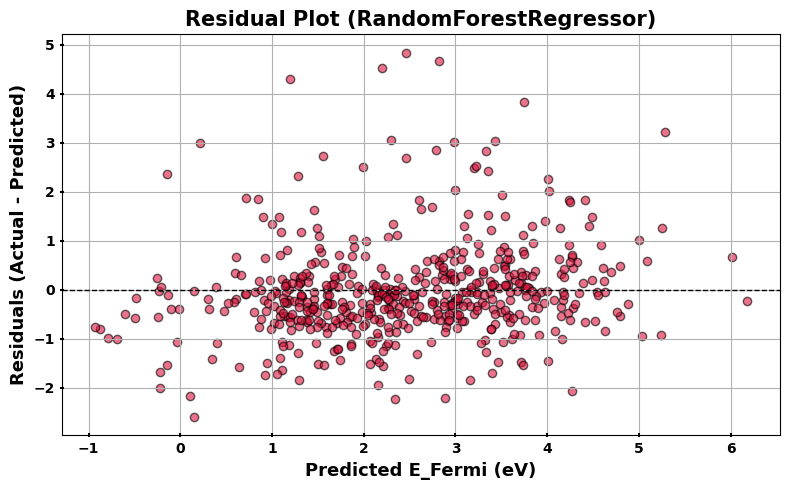

In [ ]:
# @title Default title text
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score

# --- Set random seeds for reproducibility ---
np.random.seed(42)
random.seed(42)

# --- Load the dataset ---
df = pd.read_csv('finall.csv')  # Replace with your actual filename

# Drop rows where the target variable is NaN
df.dropna(subset=['E_Fermi (eV)'], inplace=True)

# Define features and target
X = df.drop(columns=['E_Fermi (eV)'])
y = df['E_Fermi (eV)']

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# --- Initialize the model ---
model = RandomForestRegressor(random_state=42, n_jobs=1)

# --- Perform 5-Fold Cross-Validation (no plot) ---
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print CV scores
print("Cross-validation R² scores:", cv_scores)
print("Average cross-validation R²:", np.mean(cv_scores))

# --- Train on training set and evaluate on test set ---
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Hold-out R² score:", r2)
print("Hold-out Mean Squared Error:", mse)

# --- Residual Plot (with updated fonts) ---
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, color='crimson', alpha=0.6, edgecolor='k')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Residual Plot (RandomForestRegressor)', fontweight='bold', fontsize=15)
plt.xlabel('Predicted E_Fermi (eV)', fontweight='bold', fontsize=13)
plt.ylabel('Residuals (Actual - Predicted)', fontweight='bold', fontsize=13)
plt.tick_params(axis='both', direction='inout', labelsize=10, width=1.5)
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.grid(True)
plt.tight_layout()
plt.savefig('rf_residual_plot.png', dpi=600)
plt.show()


Cross-validation R² scores: [0.41625389 0.61306798 0.74111738 0.51223024 0.64009695]
Average cross-validation R²: 0.584553285868757
Hold-out R² score: 0.6886956685315158
Hold-out Mean Squared Error: 0.9254165656601446


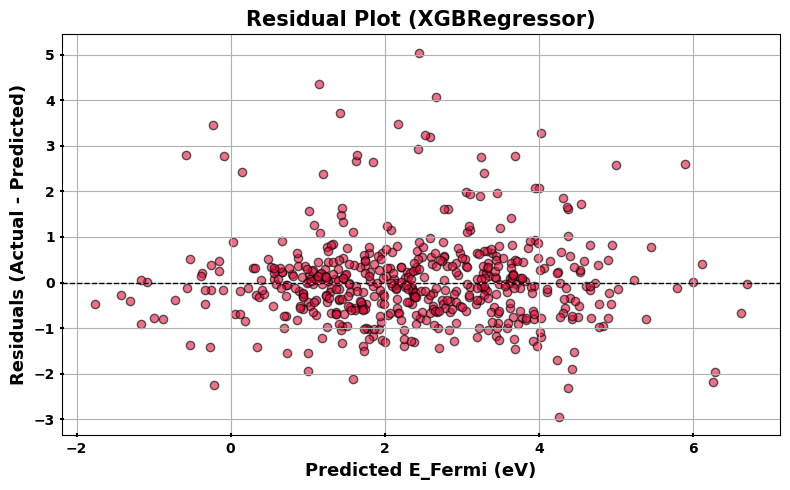

In [ ]:
# @title Default title text
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from xgboost import XGBRegressor

# --- Set random seeds for reproducibility ---
np.random.seed(42)
random.seed(42)

# --- Load the dataset ---
df = pd.read_csv('finall.csv')  # Replace with your actual file

# Drop rows where the target variable is NaN
df.dropna(subset=['E_Fermi (eV)'], inplace=True)

# Define features and target
X = df.drop(columns=['E_Fermi (eV)'])
y = df['E_Fermi (eV)']

# --- Fix illegal characters in column names for XGBoost ---
X.columns = [str(col).replace('[', '')
                         .replace(']', '')
                         .replace('<', '')
                         .replace('>', '')
                         .replace(' ', '_') for col in X.columns]

# --- Train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# --- Initialize the XGBRegressor ---
model = XGBRegressor(random_state=42, n_jobs=1, verbosity=0)

# --- Perform 5-Fold Cross-Validation (no plot) ---
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')

# Print CV scores
print("Cross-validation R² scores:", cv_scores)
print("Average cross-validation R²:", np.mean(cv_scores))

# --- Train on training set and evaluate on test set ---
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Hold-out R² score:", r2)
print("Hold-out Mean Squared Error:", mse)

# --- Residual Plot (with updated fonts) ---
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, color='crimson', alpha=0.6, edgecolor='k')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Residual Plot (XGBRegressor)', fontweight='bold', fontsize=15)
plt.xlabel('Predicted E_Fermi (eV)', fontweight='bold', fontsize=13)
plt.ylabel('Residuals (Actual - Predicted)', fontweight='bold', fontsize=13)
plt.tick_params(axis='both', direction='inout', labelsize=10, width=1.5)
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')

plt.grid(True)
plt.tight_layout()
plt.savefig('xgb_residual_plot.png', dpi=600)
plt.show()


In [ ]:
X_train

,Band Gap (eV),density,vpa,packing fraction,spacegroup_num,crystal_system_int,n_symmetry_ops,rdf _0.00000 - 0.10000_A,rdf _0.10000 - 0.20000_A,rdf _0.20000 - 0.30000_A,...,crystal_system_hexagonal,crystal_system_monoclinic,crystal_system_orthorhombic,crystal_system_tetragonal,crystal_system_triclinic,crystal_system_trigonal,is_centrosymmetric_False,is_centrosymmetric_True,Ion_compound possible_False,Ion_compound possible_True
0,3.5226,9.109130,18.302245,0.708471,164,3,24,0,0,0,...,0,0,0,0,0,1,0,1,0.0,1.0
2,2.0031,8.848788,12.272569,0.737706,221,1,48,0,0,0,...,0,0,0,0,0,0,0,1,0.0,1.0
3,0.9888,8.889999,12.359462,0.732519,221,1,48,0,0,0,...,0,0,0,0,0,0,0,1,0.0,1.0
4,2.8959,9.314495,12.291016,0.699315,221,1,96,0,0,0,...,0,0,0,0,0,0,0,1,0.0,1.0
5,0.3872,8.565436,15.273823,0.591275,34,5,8,0,0,0,...,0,0,1,0,0,0,1,0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2050,0.8081,5.807298,30.030494,1.014088,55,5,16,0,0,0,...,0,0,1,0,0,0,0,1,1.0,0.0
2051,1.8728,3.876223,23.440767,1.224026,61,5,8,0,0,0,...,0,0,1,0,0,0,0,1,0.0,1.0
2052,2.1824,4.259436,21.872883,1.301291,61,5,16,0,0,0,...,0,0,1,0,0,0,0,1,0.0,1.0
2053,3.0511,3.566164,19.146941,0.904623,92,4,16,0,0,0,...,0,0,0,1,0,0,1,0,0.0,1.0


Cross-validation R² scores: [0.47653691 0.53545148 0.61301503 0.62208923 0.45196523]
Average cross-validation R²: 0.5398115770337466
Hold-out R² score: 0.6395506682358187
Hold-out Mean Squared Error: 1.0715102521131226


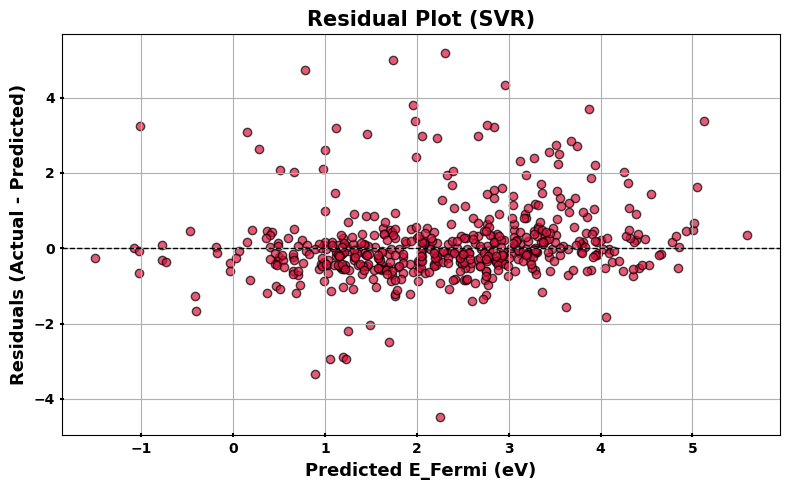

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer

# --- Load the dataset ---
df = pd.read_csv('finall.csv')  # Replace with your actual file

# Drop rows with missing target values
df.dropna(subset=['E_Fermi (eV)'], inplace=True)

# Define features and target
X = df.drop(columns=['E_Fermi (eV)'])
y = df['E_Fermi (eV)']

# --- Create pipeline: Imputer + StandardScaler + SVR ---
model = make_pipeline(
    SimpleImputer(strategy='mean'),
    StandardScaler(),
    SVR(kernel='rbf', C=1.0, epsilon=0.1)
)

# --- Perform 5-Fold Cross-Validation ---
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validation R² scores:", cv_scores)
print("Average cross-validation R²:", np.mean(cv_scores))

# --- Hold-out evaluation on train/test split ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the pipeline and predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Hold-out R² score:", r2)
print("Hold-out Mean Squared Error:", mse)

# --- Residual Plot with updated style ---
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, color='crimson', alpha=0.7, edgecolor='k')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Residual Plot (SVR)', fontweight='bold', fontsize=15)
plt.xlabel('Predicted E_Fermi (eV)', fontweight='bold', fontsize=13)
plt.ylabel('Residuals (Actual - Predicted)', fontweight='bold', fontsize=13)
plt.tick_params(axis='both', direction='inout', labelsize=10, width=1.5)
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.savefig('svr_residual_plot.png', dpi=600)
plt.show()


In [ ]:
pip install lightgbm


[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.020243 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 92496
[LightGBM] [Info] Number of data points in the train set: 2131, number of used features: 581
[LightGBM] [Info] Start training from score 2.312120
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of testing was 0.019978 seconds.
You can set `force_col_wise=true` to remove the overhead.
[LightGBM] [Info] Total Bins 92510
[LightGBM] [Info] Number of data points in the train set: 2131, number of used features: 575
[LightGBM] [Info] Start training from score 2.334570
[LightGBM] [Warning] Found whitespace in feature_names, replace with underlines
[LightGBM] [Info] Auto-choosing col-wise multi-threading, the overhead of 

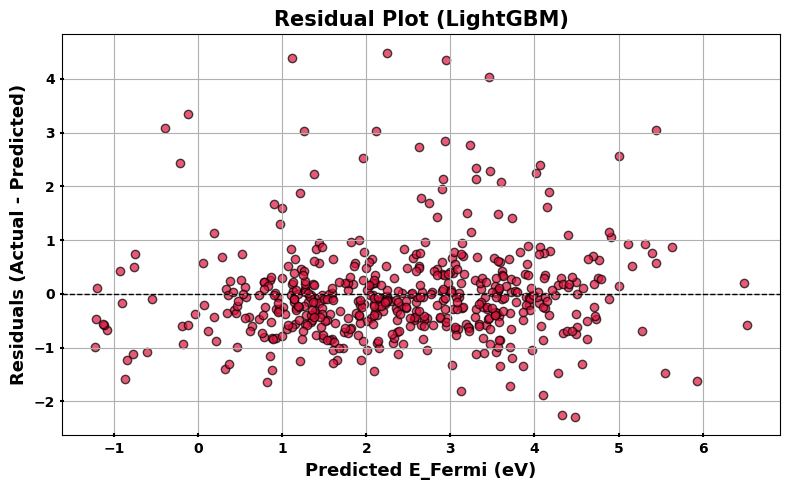

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

# --- Load the dataset ---
df = pd.read_csv('finall.csv')  # Replace with your actual file

# Drop rows with missing target values
df.dropna(subset=['E_Fermi (eV)'], inplace=True)

# Define features and target
X = df.drop(columns=['E_Fermi (eV)'])
y = df['E_Fermi (eV)']

# Sanitize column names for LightGBM
X.columns = X.columns.str.replace('[\[\]<>]', '_', regex=True)

# --- Initialize the LightGBM model ---
model = LGBMRegressor(
    n_estimators=100,
    learning_rate=0.1,
    max_depth=-1,
    random_state=42
)

# --- Perform 5-Fold Cross-Validation ---
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validation R² scores:", cv_scores)
print("Average cross-validation R²:", np.mean(cv_scores))

# --- Train/Test Split and Evaluation ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Hold-out R² score:", r2)
print("Hold-out Mean Squared Error:", mse)

# --- Residual Plot (with updated font and tick settings) ---
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, color='crimson', alpha=0.7, edgecolor='k')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Residual Plot (LightGBM)', fontweight='bold', fontsize=15)
plt.xlabel('Predicted E_Fermi (eV)', fontweight='bold', fontsize=13)
plt.ylabel('Residuals (Actual - Predicted)', fontweight='bold', fontsize=13)
plt.tick_params(axis='both', direction='inout', labelsize=10, width=1.5)
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.savefig('lgbm_residual_plot.png', dpi=600)
plt.show()


In [ ]:
pip install catboost

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 99.2/99.2 MB 9.0 MB/s eta 0:00:00


Cross-validation R² scores: [0.51274297 0.65977141 0.7602088  0.64983807 0.72004917]
Average cross-validation R²: 0.6605220852589
Hold-out R² score: 0.7534533540523795
Hold-out Mean Squared Error: 0.7329109405307869


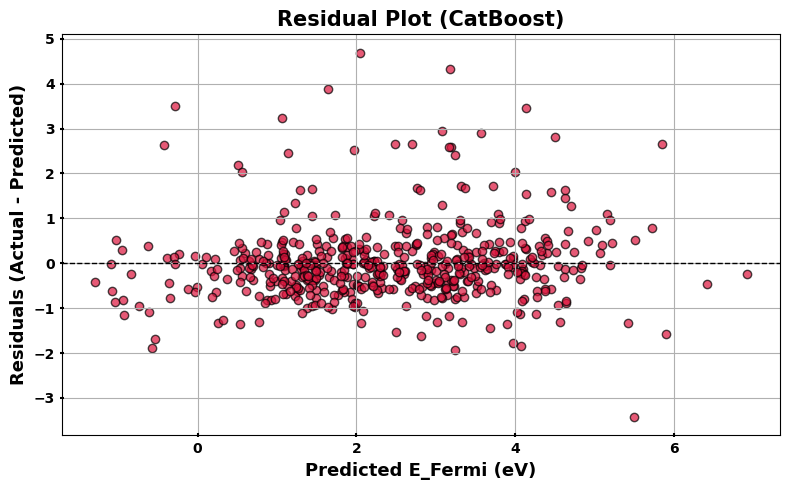

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.metrics import mean_squared_error, r2_score
from catboost import CatBoostRegressor

# --- Load the dataset ---
df = pd.read_csv('finall.csv')  # Replace with your actual file

# Drop rows with missing target values
df.dropna(subset=['E_Fermi (eV)'], inplace=True)

# Define features and target
X = df.drop(columns=['E_Fermi (eV)'])
y = df['E_Fermi (eV)']

# --- Initialize CatBoost model (silent mode) ---
model = CatBoostRegressor(
    iterations=500,
    learning_rate=0.1,
    depth=6,
    random_seed=42,
    verbose=0
)

# --- Perform 5-Fold Cross-Validation (text only) ---
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validation R² scores:", cv_scores)
print("Average cross-validation R²:", np.mean(cv_scores))

# --- Train/test split evaluation ---
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Evaluation metrics
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)

print("Hold-out R² score:", r2)
print("Hold-out Mean Squared Error:", mse)

# --- Residual Plot (with updated styling) ---
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, color='crimson', alpha=0.7, edgecolor='k')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Residual Plot (CatBoost)', fontweight='bold', fontsize=15)
plt.xlabel('Predicted E_Fermi (eV)', fontweight='bold', fontsize=13)
plt.ylabel('Residuals (Actual - Predicted)', fontweight='bold', fontsize=13)
plt.tick_params(axis='both', direction='inout', labelsize=10, width=1.5)
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.savefig('catboost_residual_plot.png', dpi=600)
plt.show()


Cross-validation R² scores: [0.0861337  0.28691412 0.46942633 0.28646634 0.47530239]
Average cross-validation R²: 0.32084857567376635
Hold-out R² score: 0.5139349569736003
Hold-out Mean Squared Error: 1.4449289564429955


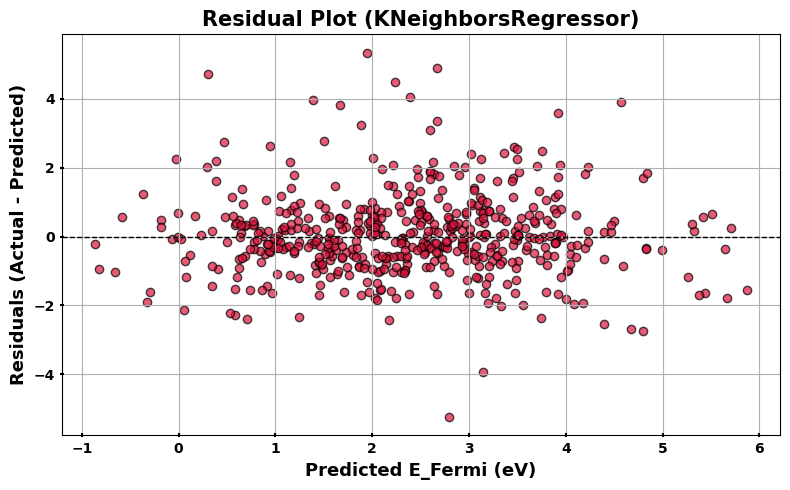

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer  # Import SimpleImputer

# --- Load the dataset ---
df = pd.read_csv('finall.csv')  # Replace with your actual file

# Drop rows with missing target values
df.dropna(subset=['E_Fermi (eV)'], inplace=True)

# Define features and target
X = df.drop(columns=['E_Fermi (eV)'])
y = df['E_Fermi (eV)']

# --- Initialize pipeline with imputation, scaling and KNN ---
model = make_pipeline(
    SimpleImputer(strategy='mean'),  # Handle NaNs
    StandardScaler(),
    KNeighborsRegressor(
        n_neighbors=5,
        weights='uniform',
        metric='minkowski'
    )
)

# --- Perform 5-Fold Cross-Validation ---
cv_scores = cross_val_score(model, X, y, cv=5, scoring='r2')
print("Cross-validation R² scores:", cv_scores)
print("Average cross-validation R²:", np.mean(cv_scores))

# --- Train/test split evaluation ---
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Train the pipeline on training data and predict
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print("Hold-out R² score:", r2)
print("Hold-out Mean Squared Error:", mse)

# --- Residual Plot with updated style ---
residuals = y_test - y_pred

plt.figure(figsize=(8, 5))
plt.scatter(y_pred, residuals, color='crimson', alpha=0.7, edgecolor='k')
plt.axhline(0, color='black', linestyle='--', linewidth=1)
plt.title('Residual Plot (KNeighborsRegressor)', fontweight='bold', fontsize=15)
plt.xlabel('Predicted E_Fermi (eV)', fontweight='bold', fontsize=13)
plt.ylabel('Residuals (Actual - Predicted)', fontweight='bold', fontsize=13)
plt.tick_params(axis='both', direction='inout', labelsize=10, width=1.5)
plt.xticks(fontsize=10, fontweight='bold')
plt.yticks(fontsize=10, fontweight='bold')
plt.grid(True)
plt.tight_layout()
plt.savefig('knn_residual_plot.png', dpi=600)
plt.show()


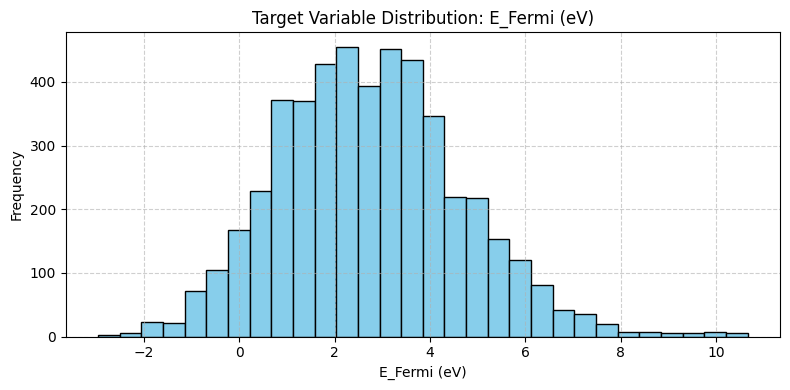

In [ ]:
import matplotlib.pyplot as plt

# Assuming df is your DataFrame and target is 'E_Fermi (eV)'

# Drop missing target values first if not done yet
df = df.dropna(subset=['E_Fermi (eV)'])

# Plot Target Distribution Histogram
plt.figure(figsize=(8, 4))
plt.hist(df['E_Fermi (eV)'], bins=30, edgecolor='black', color='skyblue')
plt.title('Target Variable Distribution: E_Fermi (eV)')
plt.xlabel('E_Fermi (eV)')
plt.ylabel('Frequency')
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
